# MATH 189 Final Project


## Statement of Project

Analyzing the wealth distribution among billionaires is vital for understanding broader economic inequalities that plague our current economy. This analysis extends insights to lower income groups, helping to evaluate the effectiveness of economic systems and policies in fostering equitable growth. By studying wealth accumulation dynamics, we hope to uncover patterns and barriers to wealth equality, aiding the understanding of our current economic climate and the creation of future inclusive economic strategies.

https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

## Imports

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys

sys.path.append('/Users/liangj/MATH189Final/modules')
from data_cleaning import *


## Importing Dataset

In [2]:
### DEFINING parent directory, different for each person
data_dir = '/Users/liangj/Desktop/WI24/Final Data'

### Billionaires Data
billionaires = pd.read_csv(data_dir + '/billionaires.csv')

### EdStats Data
ed_stats_country = pd.read_csv(data_dir+'/EdStatsCountry.csv', usecols=lambda column : column != 'Unnamed: 31')

### world country data

country_df = pd.read_csv(data_dir + '/world-data-2023.csv')


## Cleaning

In [3]:
df_merged= merge_billionaires_ed_stats(billionaires, ed_stats_country, country_df)

In [4]:
df = clean_and_prepare_df(df_merged)

# Proof of cleaned data
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values
df.shape

/Users/liangj/MATH189Final/modules/data_cleaning.py:68: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('%', '').str.replace(',', '').str.replace('$','').str.replace(' ','').astype(float)


(2640, 96)

In [5]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,6.8,3.27,67059887.0,55.1,24.2,60.7,8.43,54123364.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.70,270663028.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.70,270663028.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.70,270663028.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.70,270663028.0,37.090240,-95.712891


## EDA

In [7]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'selfMade',
       'status', 'gender', 'birthDate', 'lastName', 'firstName', 'date',
       'state', 'residenceStateRegion', 'birthYear', 'birthMonth', 'birthDay',
       'cpi_country', 'cpi_change_country', 'gdp_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category',
       'System of National Accounts', 'PPP survey year',
       'Balance of Payments Manual in us

<Axes: xlabel='country'>

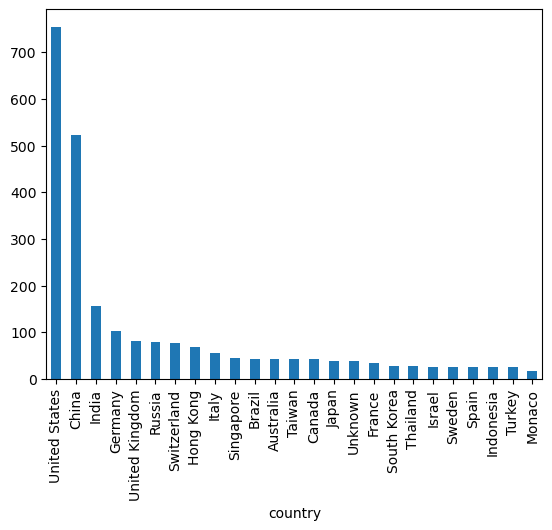

In [6]:
## Plotting Distribution of Billionaires by top countries
df.groupby('country')['personName'].count().sort_values(ascending=False).iloc[:25].plot(kind='bar')

### By Industry

In [86]:
df['industries'].value_counts()

Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
Energy                        100
Media & Entertainment          91
Metals & Mining                74
Automotive                     73
Service                        53
Construction & Engineering     45
Logistics                      40
Sports                         39
Telecom                        31
Gambling & Casinos             25
Unknown                         0
Name: industries, dtype: int64

<Axes: xlabel='industries'>

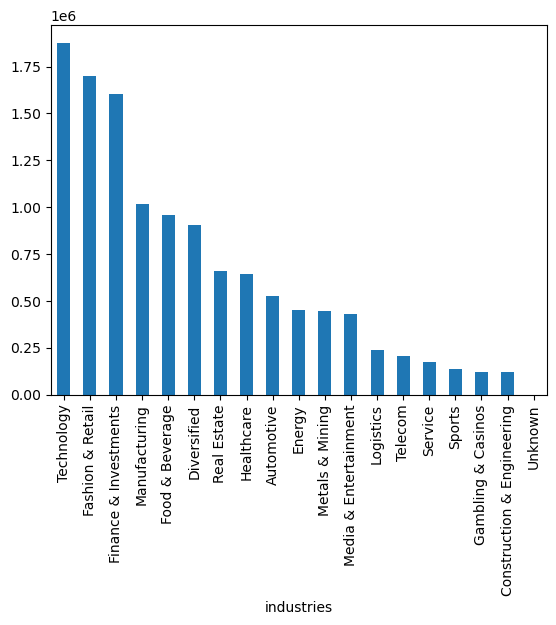

In [91]:
df.groupby('industries')['finalWorth'].sum().sort_values(ascending = False).plot(kind = 'bar')

### Gender Disparity

In [61]:
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

In [76]:
males['finalWorth'].describe()

count      2303.000000
mean       4631.610942
std       10119.861563
min        1000.000000
25%        1500.000000
50%        2300.000000
75%        4200.000000
max      211000.000000
Name: finalWorth, dtype: float64

In [75]:
females['finalWorth'].describe()

count      337.000000
mean      4570.326409
std       7612.478646
min       1000.000000
25%       1500.000000
50%       2500.000000
75%       4800.000000
max      80500.000000
Name: finalWorth, dtype: float64

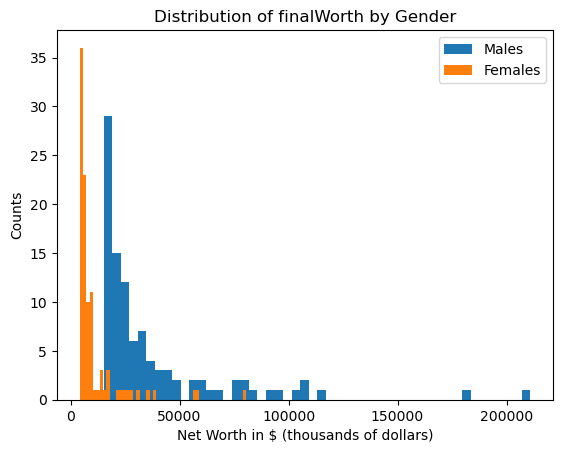

In [70]:
# distribution of networths between males and females
plt.hist(males['finalWorth'][:100], bins = 50, label = 'Males')
plt.hist(females['finalWorth'][:100], bins = 50, label = 'Females')
plt.xlabel('Net Worth in $ (thousands of dollars)')
plt.ylabel('Counts')
plt.title('Distribution of finalWorth by Gender')
plt.legend()
plt.show()

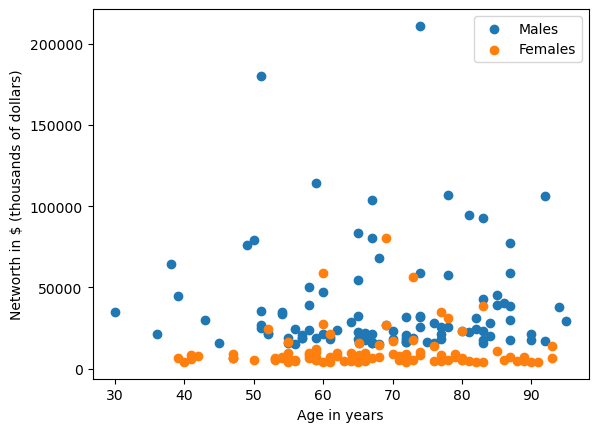

In [72]:
# Relationship between age and networth?
plt.scatter(males['age'][:100], males['finalWorth'][:100], label = 'Males')
plt.scatter(females['age'][:100], females['finalWorth'][:100], label = 'Females')
plt.legend()
plt.xlabel('Age in years')
plt.ylabel('Networth in $ (thousands of dollars)')
plt.show()